In [2]:
import skimage
from skimage import draw
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import cv2
import os

In [3]:
PREDICTION_PATH = './prediction_labels_tests/'
TRAIN_PATH = '../data/train_images/'

In [4]:
images = [f for f in listdir(TRAIN_PATH) if isfile(join(TRAIN_PATH, f))]
print(str(len(images)) + ' train images found in folder: ' + TRAIN_PATH)

94 train images found in folder: ../data/train_images/


In [5]:
def treat_images(treatment_func, parameters, result_path):
    for img_path in images:
        parameters['img'] = cv2.imread(TRAIN_PATH + img_path, 0)
        result = treatment_func(parameters)

        cv2.imwrite(result_path + img_path, result)

In [50]:
def get_gaussian_otsu_thresholding_from(parameters):
    blur = cv2.GaussianBlur(parameters['img'], (parameters['gKernelWidth'], parameters['gKernelHeight']), 0)
    ret3, result = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return result

In [66]:
def get_gaussian_otsu_thresholding_2_from(parameters):
    blur = cv2.GaussianBlur(parameters['img'], (parameters['gKernelWidth'], parameters['gKernelHeight']), 0)
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)

    cv2.imwrite(PREDICTION_PATH + 'threshed.png', laplacian)
    img = cv2.imread(PREDICTION_PATH + 'threshed.png', 0)
    blur = cv2.GaussianBlur(img, (parameters['gKernelWidth'], parameters['gKernelHeight']), 0)
    ret, result = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return result

In [67]:
params = {}

MAX_THRESHOLD_VALUE = 255
MIN_THRESHOLD_VALUE = 0

"""MAX_KERNEL_VALUE = 30
MIN_KERNEL_VALUE = 21

for i in range(MIN_KERNEL_VALUE, MAX_KERNEL_VALUE, 2):
    params['gKernelWidth'] = i
    for j in range(MIN_KERNEL_VALUE, MAX_KERNEL_VALUE, 2):
        params['gKernelHeight'] = j
        path = PREDICTION_PATH + 'gKernelWidth ' + str(params['gKernelWidth']) + ' ; ' + 'gKernelHeight ' + str(params['gKernelHeight']) + '/'
        if not os.path.exists(path):
            os.makedirs(path)
        treat_images(get_gaussian_otsu_thresholding_from, params, path)"""

params['gKernelWidth'] = 51
params['gKernelHeight'] = 51

for img in images:
    params['img'] = cv2.imread(TRAIN_PATH + img, 0)
    result = get_gaussian_otsu_thresholding_2_from(params)

    cv2.imwrite(PREDICTION_PATH + img, result)

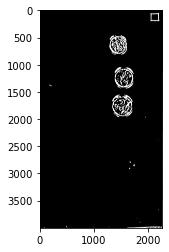

In [65]:
#Histogramme 
from scipy import ndimage

img_to_check = '20220124_132514.jpg'
img = cv2.imread(TRAIN_PATH + img_to_check, 0)
blur = cv2.GaussianBlur(img, (29, 29), 0)

laplacian = cv2.Laplacian(blur, cv2.CV_64F)

cv2.imwrite(PREDICTION_PATH + 'threshed.png', laplacian)
img = cv2.imread(PREDICTION_PATH + 'threshed.png', 0)
blur = cv2.GaussianBlur(img, (29, 29), 0)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')
plt.show()